In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ArabicFeaurures = '/content/drive/MyDrive/ZAKA MACHINE LEARNING CERTIFICATION/CAPSTONE PROJECT/araN.csv'
EnglishFeatures='/content/drive/MyDrive/ZAKA MACHINE LEARNING CERTIFICATION/CAPSTONE PROJECT/engN.csv'
ArabicFeaururesData = pd.read_csv(ArabicFeaurures)
EnglishFeaturesData = pd.read_csv(EnglishFeatures) 
FullData=pd.concat([ArabicFeaururesData,EnglishFeaturesData])
FullData.head(5)

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,chroma_cqt,chroma_cens,melspectrogram,mfcc,rms,spectral_contrast,poly_features,tonnetz,zero_crossing_rate,Class
0,0.361627,2093.479979,2756.611745,3717.276999,0.519177,0.249534,1.255769,-20.867493,0.047192,17.207381,0.279122,0.009241,0.039775,A
1,0.377552,2249.304276,2695.011260,3910.200639,0.512439,0.252403,1.223430,-21.290136,0.047345,18.046612,0.299653,-0.009953,0.052820,A
2,0.365353,2253.220790,3029.373531,4187.581169,0.534871,0.263015,1.083463,-22.431240,0.038590,16.756501,0.277767,0.014904,0.039435,A
3,0.441495,2340.682081,2650.892994,4155.394452,0.607075,0.268242,0.909926,-20.949730,0.037875,16.987508,0.258348,0.004576,0.058055,A
4,0.412772,2282.930057,2769.853283,3927.473262,0.537294,0.254573,0.740264,-22.041950,0.036171,16.905617,0.237889,0.010782,0.054639,A


In [ ]:
# select Arabic 
Arabic = FullData[(FullData.Class == "A")]

# select Englis
English = FullData[(FullData.Class == "E")]


print('There are {} Arabic and {} English.'.format(Arabic.shape[0], English.shape[0]))

There are 20000 Arabic and 20000 English.


In [ ]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
FullData['Class'] = encoder.fit_transform(FullData['Class'])

In [ ]:
FullData.max().to_csv("/content/drive/MyDrive/Colab Notebooks/Final Models/MAX.csv")

FullDataUpdated = FullData.divide(FullData.max(axis=0))

FullDataUpdated.describe()


,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,chroma_cqt,chroma_cens,melspectrogram,mfcc,rms,spectral_contrast,poly_features,tonnetz,zero_crossing_rate,Class
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.558317,0.334742,0.460383,0.348331,0.604364,0.854873,2.613195e-02,-2.880016,0.101542,0.719378,0.073475,0.009881,0.164132,0.500000
std,0.113670,0.114648,0.120183,0.127879,0.096157,0.062211,3.344614e-02,0.990715,0.068435,0.057002,0.050466,0.067395,0.079905,0.500006
min,0.066808,0.030573,0.054923,0.013434,0.202212,0.482314,9.061197e-09,-8.264840,0.000121,0.326247,0.000073,-0.432423,0.006164,0.000000
25%,0.499246,0.256330,0.382825,0.258936,0.540991,0.818554,4.581662e-03,-3.519717,0.047773,0.683244,0.035767,-0.026600,0.107281,0.000000
50%,0.567552,0.326148,0.464210,0.338513,0.606000,0.862892,1.771784e-02,-2.877337,0.093472,0.720066,0.067882,0.004143,0.150907,0.500000
75%,0.631464,0.402459,0.542385,0.428339,0.668603,0.899676,3.710764e-02,-2.233223,0.142557,0.756320,0.101914,0.036857,0.205605,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(96, input_dim=13, activation='relu'))
model.add(Dense(88, activation='relu'))
model.add(Dense(44, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 88)                8536      
_________________________________________________________________
dense_2 (Dense)              (None, 44)                3916      
_________________________________________________________________
dense_3 (Dense)              (None, 22)                990       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                230       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 1

In [ ]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
from sklearn.model_selection import train_test_split

x = FullDataUpdated.iloc[:,:-1]
y = FullDataUpdated.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35,shuffle=True)

history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
813/813 [==============================] - 4s 4ms/step - loss: 0.4762 - accuracy: 0.7654 - precision: 0.7557 - recall: 0.7866 - val_loss: 0.3533 - val_accuracy: 0.8571 - val_precision: 0.8670 - val_recall: 0.8418
Epoch 2/15
813/813 [==============================] - 2s 3ms/step - loss: 0.3464 - accuracy: 0.8593 - precision: 0.8531 - recall: 0.8692 - val_loss: 0.3392 - val_accuracy: 0.8595 - val_precision: 0.8864 - val_recall: 0.8228
Epoch 3/15
813/813 [==============================] - 2s 3ms/step - loss: 0.3310 - accuracy: 0.8662 - precision: 0.8575 - recall: 0.8795 - val_loss: 0.3720 - val_accuracy: 0.8451 - val_precision: 0.9077 - val_recall: 0.7663
Epoch 4/15
813/813 [==============================] - 3s 3ms/step - loss: 0.3230 - accuracy: 0.8665 - precision: 0.8573 - recall: 0.8803 - val_loss: 0.3138 - val_accuracy: 0.8709 - val_precision: 0.8546 - val_recall: 0.8921
Epoch 5/15
813/813 [==============================] - 2s 3ms/step - loss: 0.3192 - accuracy: 0.8692 - pr

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


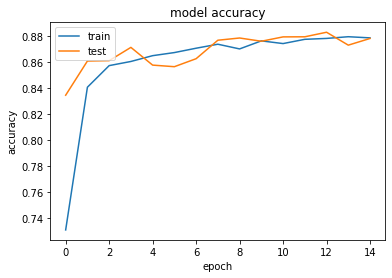

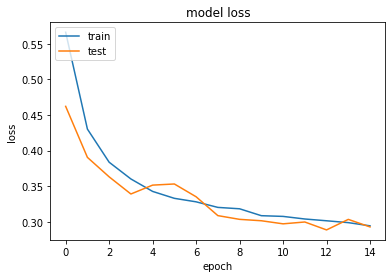

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:


model = Sequential()
model.add(Dense(96, input_dim=13, activation='relu'))
model.add(Dense(88, activation='relu'))
model.add(Dense(44, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [ ]:
training_history=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 100, batch_size=20,verbose=1)

Epoch 1/100
1300/1300 [==============================] - 5s 3ms/step - loss: 0.5381 - accuracy: 0.7617 - precision_3: 0.7376 - recall_3: 0.8141 - val_loss: 0.4532 - val_accuracy: 0.8164 - val_precision_3: 0.7649 - val_recall_3: 0.9115
Epoch 2/100
1300/1300 [==============================] - 4s 3ms/step - loss: 0.4147 - accuracy: 0.8427 - precision_3: 0.8428 - recall_3: 0.8433 - val_loss: 0.3681 - val_accuracy: 0.8676 - val_precision_3: 0.8676 - val_recall_3: 0.8663
Epoch 3/100
1300/1300 [==============================] - 3s 3ms/step - loss: 0.3711 - accuracy: 0.8573 - precision_3: 0.8492 - recall_3: 0.8695 - val_loss: 0.3427 - val_accuracy: 0.8672 - val_precision_3: 0.8410 - val_recall_3: 0.9043
Epoch 4/100
1300/1300 [==============================] - 4s 3ms/step - loss: 0.3467 - accuracy: 0.8646 - precision_3: 0.8546 - recall_3: 0.8793 - val_loss: 0.3274 - val_accuracy: 0.8739 - val_precision_3: 0.8595 - val_recall_3: 0.8927
Epoch 5/100
1300/1300 [==============================] - 4s 

In [ ]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model



dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


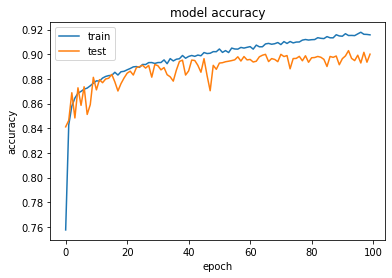

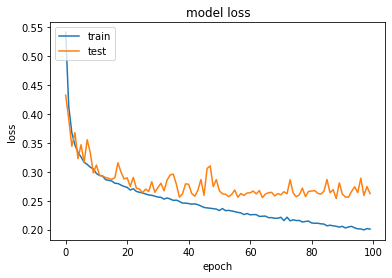

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for training and validation accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
# load the saved model
saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/Final Models/Numeric_Model_Two_Language.h5')
saved_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 96)                1344      
_________________________________________________________________
dense_126 (Dense)            (None, 88)                8536      
_________________________________________________________________
dense_127 (Dense)            (None, 44)                3916      
_________________________________________________________________
dense_128 (Dense)            (None, 22)                990       
_________________________________________________________________
dense_129 (Dense)            (None, 10)                230       
_________________________________________________________________
dense_130 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_131 (Dense)            (None, 3)               

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/my_model.h5')

In [ ]:
results=model.predict(x_test)

In [ ]:
results

array([[9.9197972e-01],
       [9.5573568e-01],
       [9.9278665e-01],
       ...,
       [2.5294423e-02],
       [6.1293519e-01],
       [2.1557738e-05]], dtype=float32)

In [ ]:
for i in range(len(results)):
    if results[i] < 0.5:
        results[i] = 0
    else:
        results[i] = 1

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, results)

array([[6300,  741],
       [ 499, 6460]])

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = # ground truth labels
y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

Accuracy: 0.911429
Precision: 0.897098
Recall: 0.928294
F1 score: 0.912429
ROC AUC: 0.911527
[[6300  741]
 [ 499 6460]]


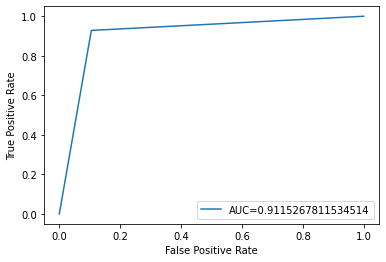

In [ ]:
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_test,  results)
auc = roc_auc_score(y_test, results)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
results.ravel()

array([1., 1., 1., ..., 0., 1., 0.], dtype=float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr =confusion_matrix(y_test, results)

sum = conf_arr.sum()

conf_arr = conf_arr 

df_cm = pd.DataFrame(conf_arr, 
  index = [ 'Arabic','English'],
  columns = [ 'Arabic','English'])

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=10000.0, fmt='.2f', cmap=cmap)

res.invert_yaxis()

plt.yticks([0.5,1.5,2.5], [ 'Arabic', 'English'],va='center')

plt.title('Confusion Matrix')

plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight' )

plt.close()